In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('\\Users\smita\Downloads\wine-quality-white-and-red (2).csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Data Summary
print('Data Summary:')
print(df.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [5]:
# Check for missing values
print('\
Missing Values:')
print(df.isnull().sum())

Missing Values:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# Descriptive Statistics
print('\
Descriptive Statistics:')
print(df.describe())

Descriptive Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000      

In [7]:
# Display unique values in the 'type' column
print("\
Unique values in 'type' column:")
print(df['type'].value_counts())

Unique values in 'type' column:
type
white    4898
red      1599
Name: count, dtype: int64


Correlation Matrix with Quality:
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


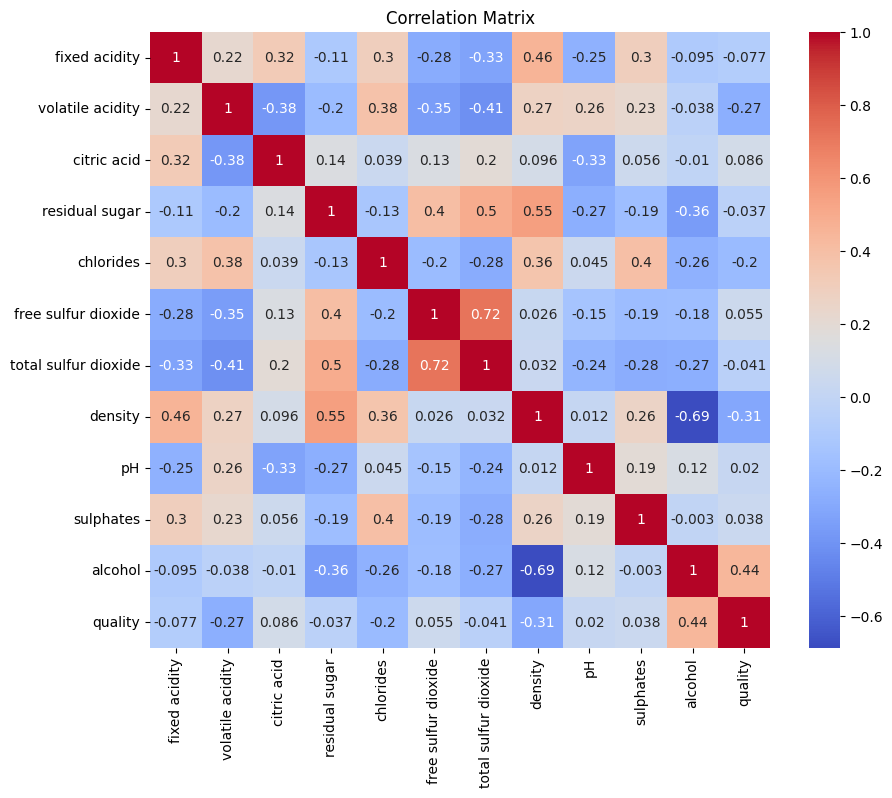

In [10]:
# Exclude non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Recalculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix for 'quality'
print('\
Correlation Matrix with Quality:')
print(correlation_matrix['quality'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Overview:**

The dataset contains 6497 entries with 13 columns, including both categorical ('type') and numerical features. There are no missing values in the dataset, which is excellent for our analysis.

**This summary gives us an idea of the distribution of various features. For example, the average alcohol content is around 10.49%, and the average quality score is approximately 5.82 on a scale that likely ranges from 0 to 10.**

**Correlation Analysis:**
The correlation matrix shows the relationship between different features and the wine quality:

* Alcohol has the strongest positive correlation (0.44) with quality, indicating that higher alcohol content is associated with higher quality wines.
* Density has the strongest negative correlation (-0.31) with quality, suggesting that lower density wines tend to be of higher quality.
* Volatile acidity has a moderate negative correlation (-0.27) with quality, implying that lower volatile acidity is associated with higher quality wines.
* Chlorides also show a negative correlation (-0.20) with quality.

**The heatmap visualizes the correlations between all features. The darker red colors indicate strong positive correlations, while darker blue colors indicate strong negative correlations.**

**Most Important Features Impacting Quality:**

Based on the correlation analysis, the most important features impacting wine quality appear to be

a. Alcohol (positive impact)
b. Density (negative impact)
c. Volatile acidity (negative impact)
d. Chlorides (negative impact)
e. Citric acid (slight positive impact)
f. Free sulfur dioxide (slight positive impact)


Top 5 features correlated with quality:
alcohol                0.444319
citric acid            0.085532
free sulfur dioxide    0.055463
sulphates              0.038485
pH                     0.019506
Name: quality, dtype: float64


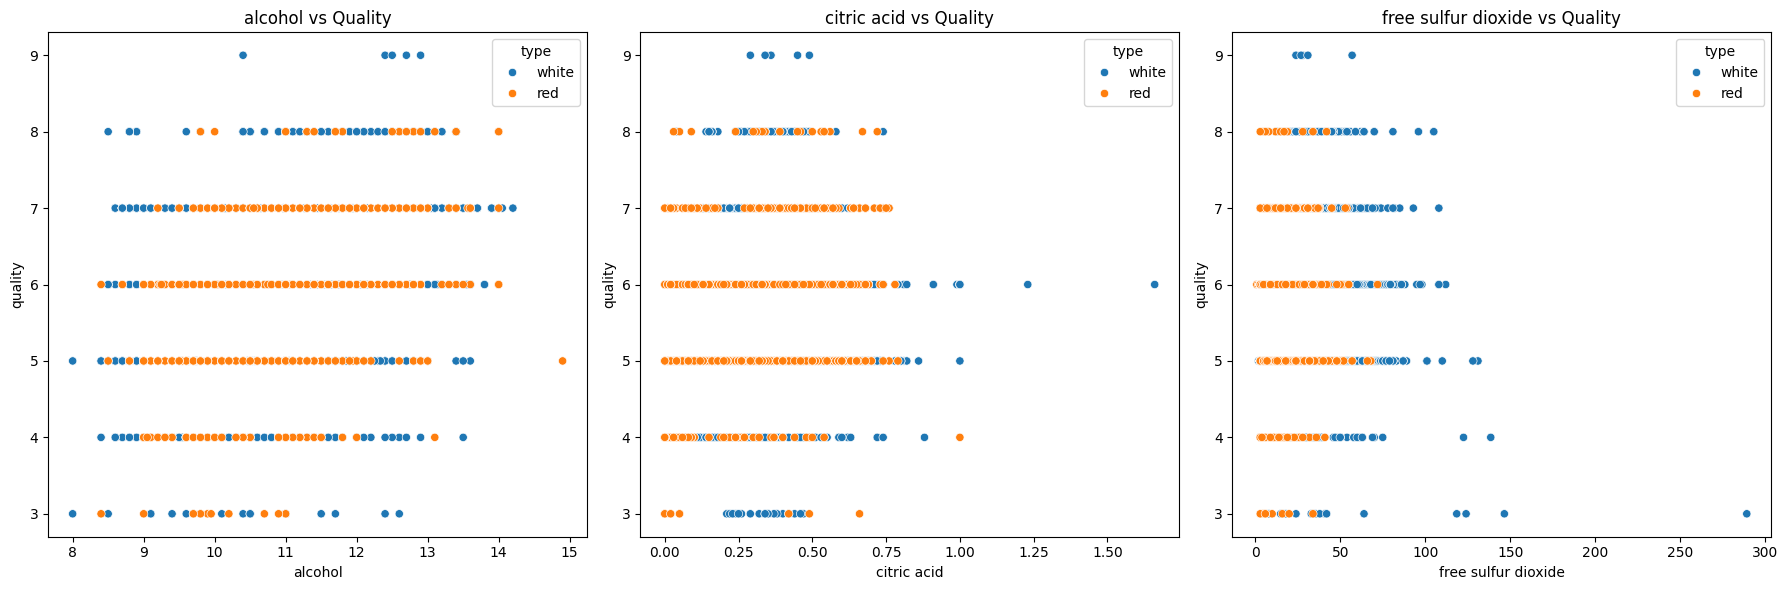

In [11]:
# Print top 5 features correlated with quality
print("Top 5 features correlated with quality:")
print(correlation_matrix ['quality'].sort_values(ascending=False)[1:6])

# Plot scatter plots for top 3 correlated features
top_features = correlation_matrix ['quality'].sort_values(ascending=False)[1:4].index
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y='quality', hue='type', ax=axes[i])
    axes[i].set_title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

C:\Users\smita\AppData\Local\Temp\ipykernel_33420\2020075043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


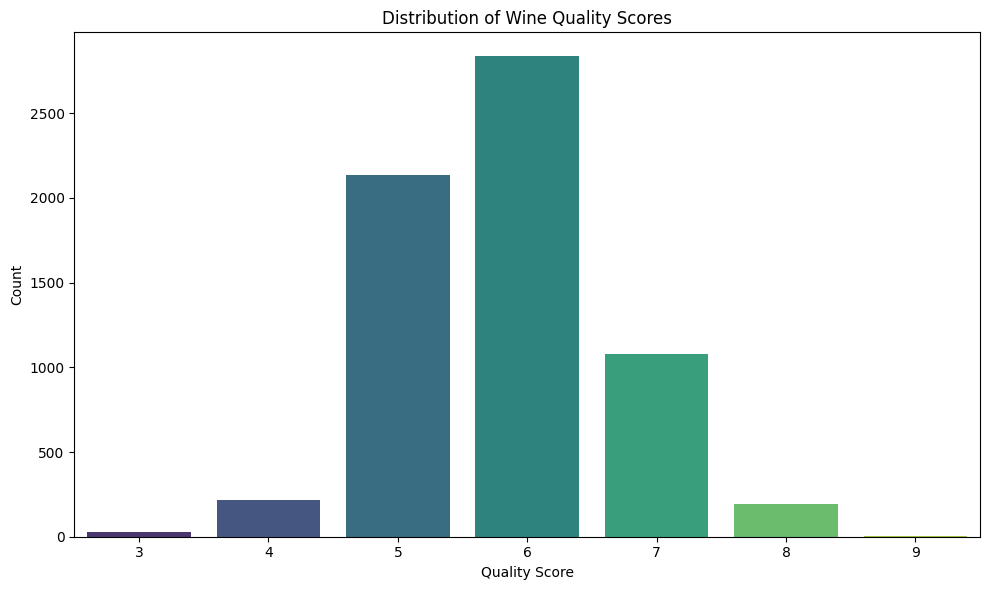

In [12]:
# Plot the distribution of wine quality scores
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert 'type' to a binary variable
wine_type = pd.get_dummies(df['type'], drop_first=True)

# Combine the binary 'type' column with the rest of the numeric data
processed_df = pd.concat([numeric_df, wine_type], axis=1)

# Define features and target variable
X = processed_df.drop('quality', axis=1)
y = processed_df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Data Preprocessing:**

* We converted the 'type' column to a binary variable.
* We scaled the features using StandardScaler.
* The data was split into training (80%) and testing (20%) sets.

Model Performance Metrics:
Accuracy: 0.8254
Precision: 0.8283
Recall: 0.8254
Detailed Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.25      0.40        32
         low       0.78      0.78      0.78       468
      medium       0.85      0.87      0.86       800

    accuracy                           0.83      1300
   macro avg       0.88      0.64      0.68      1300
weighted avg       0.83      0.83      0.82      1300



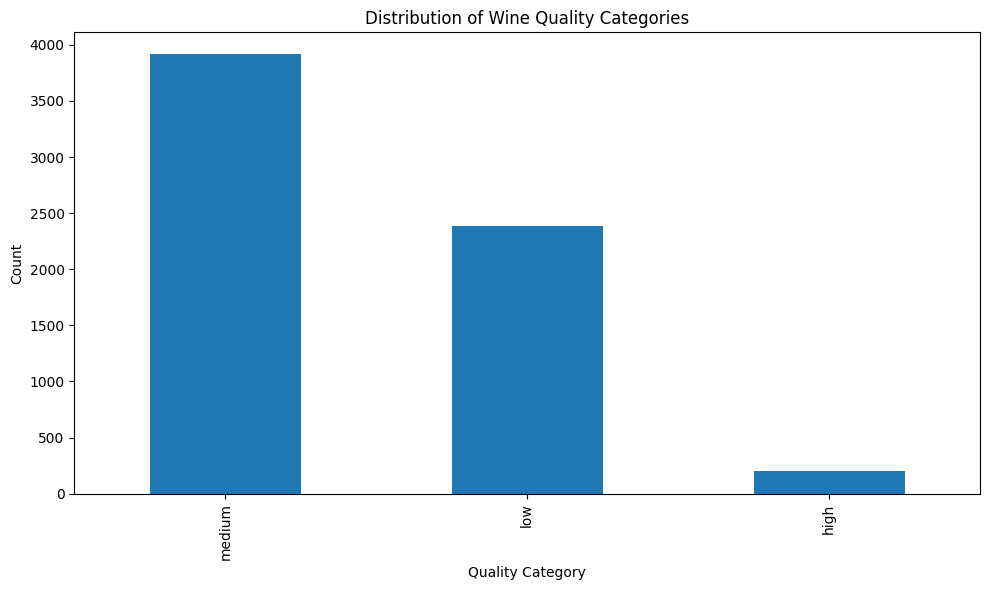

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler

# Categorize wine quality
def categorize_quality(quality):
    if quality <= 5:
        return 'low'
    elif quality <= 7:
        return 'medium'
    else:
        return 'high'

df['quality_category'] = df['quality'].apply(categorize_quality)

# Prepare the data
X = df.drop(['quality', 'quality_category', 'type'], axis=1)
y = df['quality_category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\
Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the distribution of quality categories
plt.figure(figsize=(10, 6))
df['quality_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Model Performance Metrics:**

* Accuracy: 0.8254

* Precision: 0.8283

* Recall: 0.8254

These metrics indicate that our model performs quite well in classifying wine quality into categories (low, medium, high). Let's break down what these metrics mean:

* Accuracy: 0.8254 (82.54%) - This means that our model correctly predicts the quality category for about 82.54% of the wines in the test set.

* Precision: 0.8283 (82.83%) - This is the weighted average precision across all categories. It indicates that when our model predicts a certain quality category, it's correct about 82.83% of the time.

* Recall: 0.8254 (82.54%) - This is the weighted average recall across all categories. It means that our model correctly identifies 82.54% of the wines belonging to each category.


**This provides precision, recall, and F1-score for each category:**

**High quality wines:**

* Perfect precision (1.00) but low recall (0.25)
* This means the model rarely misclassifies other wines as high quality, but it misses many truly high-quality wines.

**Low quality wines:**

* Balanced precision and recall (both 0.78)
* The model is consistent in identifying low-quality wines.

**Medium quality wines:**

* High precision (0.85) and recall (0.87)
* The model performs best on this category, which is also the most common.

**This bar plot shows the distribution of wines across the three quality categories we defined. We can observe that:**

* The 'medium' quality category is the most common.
* There are fewer 'low' quality wines than 'medium' quality wines.
*'High' quality wines are the least common in the dataset.

**This imbalance in the dataset explains why our model performs differently for each category. It's particularly good at identifying medium quality wines (the most common category) but struggles with high quality wines (the least common category).**

**To improve the model's performance, especially for high quality wines, we could consider:**

* Using techniques to handle class imbalance, such as oversampling the minority class or using class weights.
* Collecting more data, especially for high quality wines.
* Fine-tuning the model parameters or trying other algorithms that might handle imbalanced data better.
* Adjusting the thresholds for categorizing wine quality to create more balanced classes.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [17]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

In [18]:
# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

Training Logistic Regression...
Training Decision Tree...
Training Gradient Boosting...
Training SVM...
Training KNN...


In [19]:
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate models without ROC AUC for now
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy}
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

print("Classification analysis completed.")

# Print summary of results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print()

Training Logistic Regression...
Logistic Regression - Accuracy: 0.7223
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        32
         low       0.66      0.61      0.63       468
      medium       0.75      0.82      0.78       800

    accuracy                           0.72      1300
   macro avg       0.47      0.48      0.47      1300
weighted avg       0.70      0.72      0.71      1300

Training Decision Tree...
Decision Tree - Accuracy: 0.7408


c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        high       0.23      0.38      0.28        32
         low       0.70      0.70      0.70       468
      medium       0.80      0.78      0.79       800

    accuracy                           0.74      1300
   macro avg       0.58      0.62      0.59      1300
weighted avg       0.75      0.74      0.74      1300

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.7623
              precision    recall  f1-score   support

        high       0.20      0.03      0.05        32
         low       0.72      0.68      0.70       468
      medium       0.79      0.84      0.81       800

    accuracy                           0.76      1300
   macro avg       0.57      0.52      0.52      1300
weighted avg       0.75      0.76      0.75      1300

Training SVM...
SVM - Accuracy: 0.7646
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        32
         low       0.73

c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN - Accuracy: 0.7238
              precision    recall  f1-score   support

        high       0.10      0.06      0.08        32
         low       0.67      0.64      0.66       468
      medium       0.77      0.80      0.78       800

    accuracy                           0.72      1300
   macro avg       0.51      0.50      0.51      1300
weighted avg       0.72      0.72      0.72      1300

Classification analysis completed.
Logistic Regression:
  Accuracy: 0.7223

Decision Tree:
  Accuracy: 0.7408

Gradient Boosting:
  Accuracy: 0.7623

SVM:
  Accuracy: 0.7646

KNN:
  Accuracy: 0.7238



c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model Comparison:
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.722308   0.701273  0.722308
1        Decision Tree  0.750769   0.762363  0.750769
2    Gradient Boosting  0.762308   0.748656  0.762308
3                  SVM  0.764615   0.743567  0.764615
4                  KNN  0.723846   0.716138  0.723846
5        Random Forest  0.825385   0.828275  0.825385
6          Naive Bayes  0.663077   0.662254  0.663077


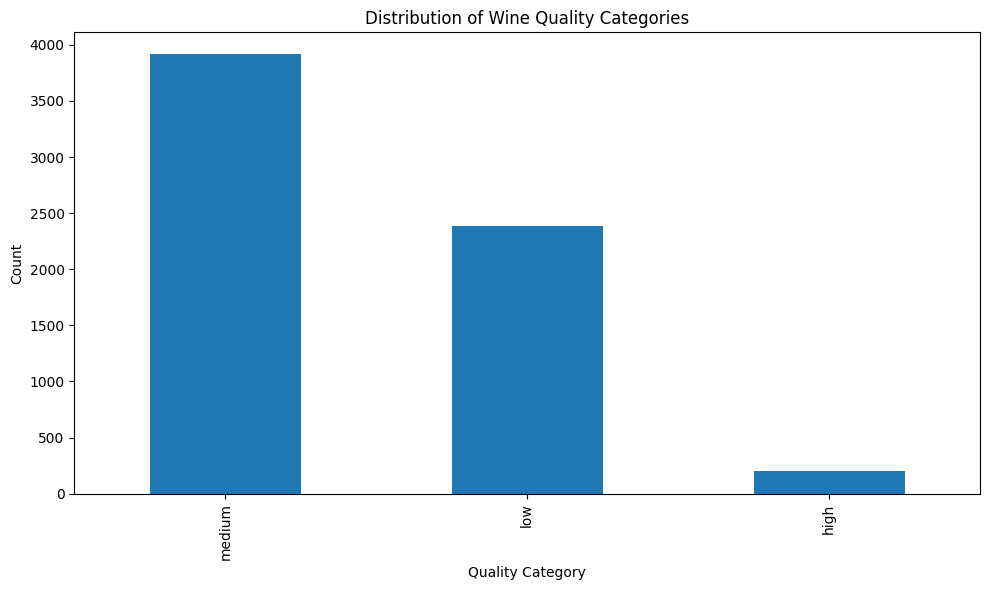

In [21]:
# Initialize an empty list to store performance metrics
performance_metrics = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on the test set
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append results to the list
    performance_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

# Convert the list to a DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Display performance table
print("\nModel Comparison:")
print(performance_df)

# Visualize the distribution of quality categories
plt.figure(figsize=(10, 6))
df['quality_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


# Define classification models, including Random Forest and Naive Bayes
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train each model and evaluate performance
model_performance = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append results to performance list
    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })
    
    # Print detailed classification report for each model
    print(f"\n{model_name} - Detailed Classification Report:")
    print(classification_report(y_test, y_pred))

c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classifi


Logistic Regression - Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        32
         low       0.66      0.61      0.63       468
      medium       0.75      0.82      0.78       800

    accuracy                           0.72      1300
   macro avg       0.47      0.48      0.47      1300
weighted avg       0.70      0.72      0.71      1300


Decision Tree - Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.23      0.34      0.28        32
         low       0.69      0.72      0.70       468
      medium       0.81      0.78      0.80       800

    accuracy                           0.75      1300
   macro avg       0.58      0.61      0.59      1300
weighted avg       0.75      0.75      0.75      1300


Gradient Boosting - Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.17   

c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classifi


SVM - Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        32
         low       0.73      0.66      0.69       468
      medium       0.78      0.86      0.82       800

    accuracy                           0.76      1300
   macro avg       0.50      0.51      0.50      1300
weighted avg       0.74      0.76      0.75      1300


KNN - Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.10      0.06      0.08        32
         low       0.67      0.64      0.66       468
      medium       0.77      0.80      0.78       800

    accuracy                           0.72      1300
   macro avg       0.51      0.50      0.51      1300
weighted avg       0.72      0.72      0.72      1300


Random Forest - Detailed Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.25      0.40        32
  

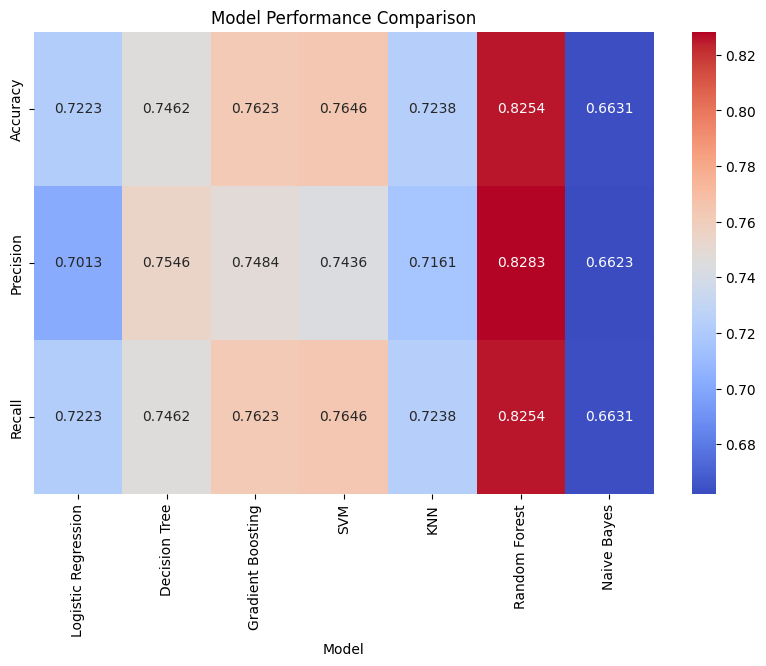

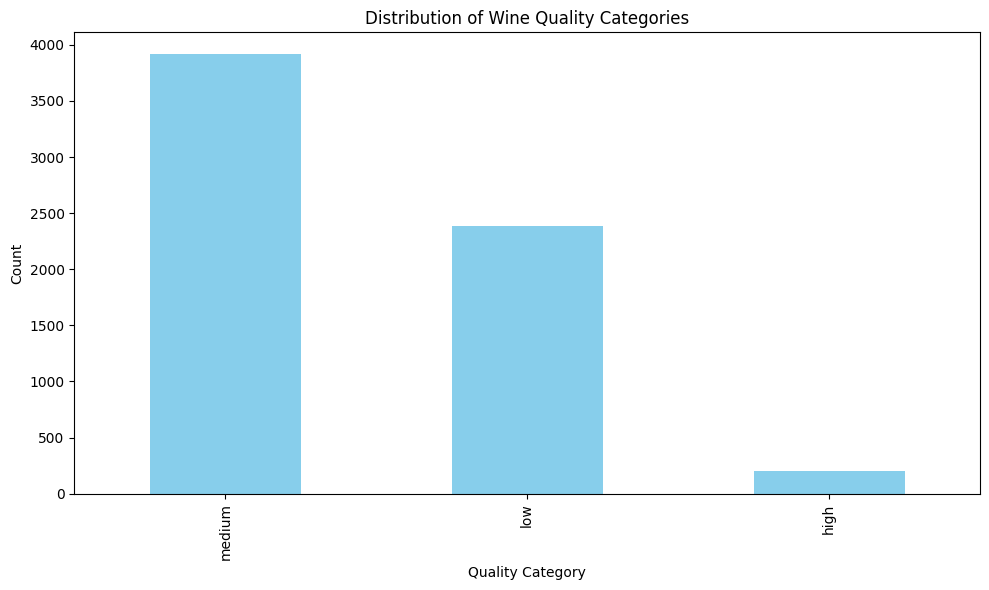

In [23]:
# Convert performance list to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display performance table using seaborn for a nicer layout
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index('Model').T, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Model Performance Comparison')
plt.show()

# Visualize the distribution of quality categories
plt.figure(figsize=(10, 6))
df['quality_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [25]:
# Train each model and evaluate performance
model_performance = []
confusion_matrices = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append results to performance list
    model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })
    
# Confusion Matrix
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smita\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


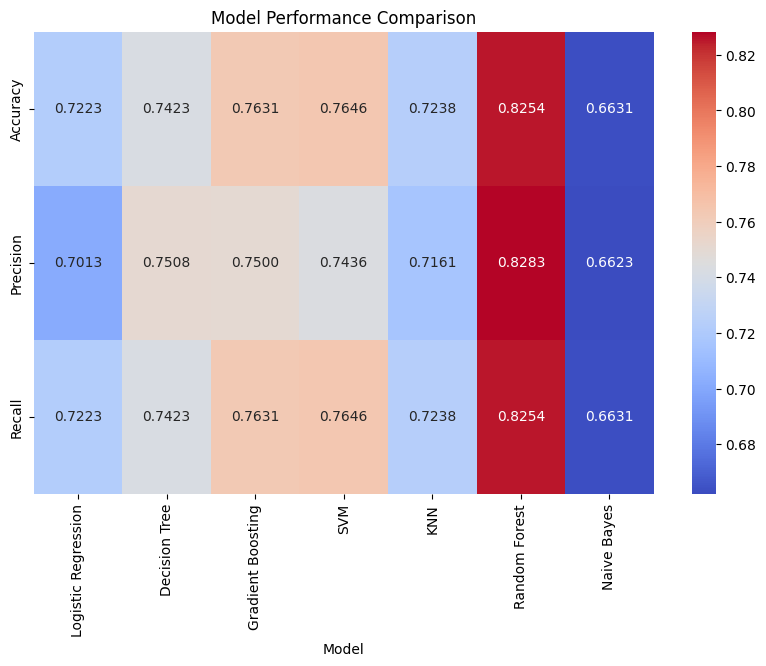

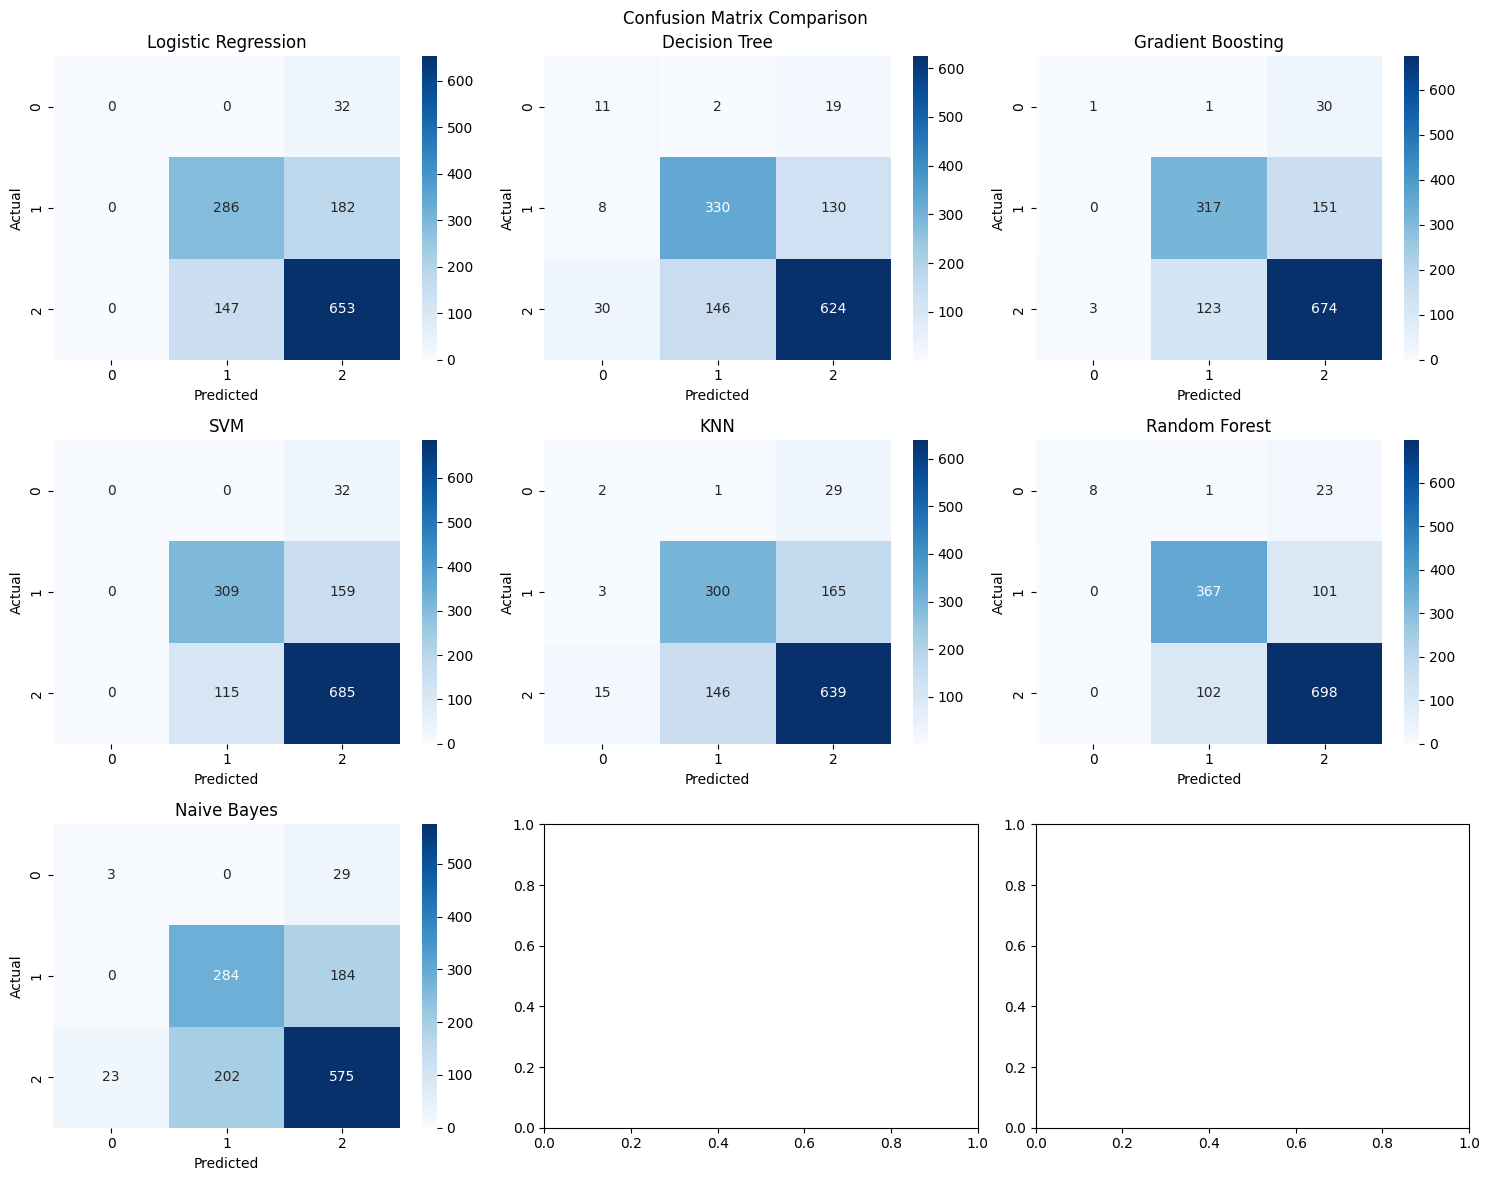

In [26]:
# Convert performance list to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display performance table using seaborn for a nicer layout
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index('Model').T, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Model Performance Comparison')
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust layout to fit more models if needed
fig.suptitle('Confusion Matrix Comparison')

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    ax = axes.flatten()[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

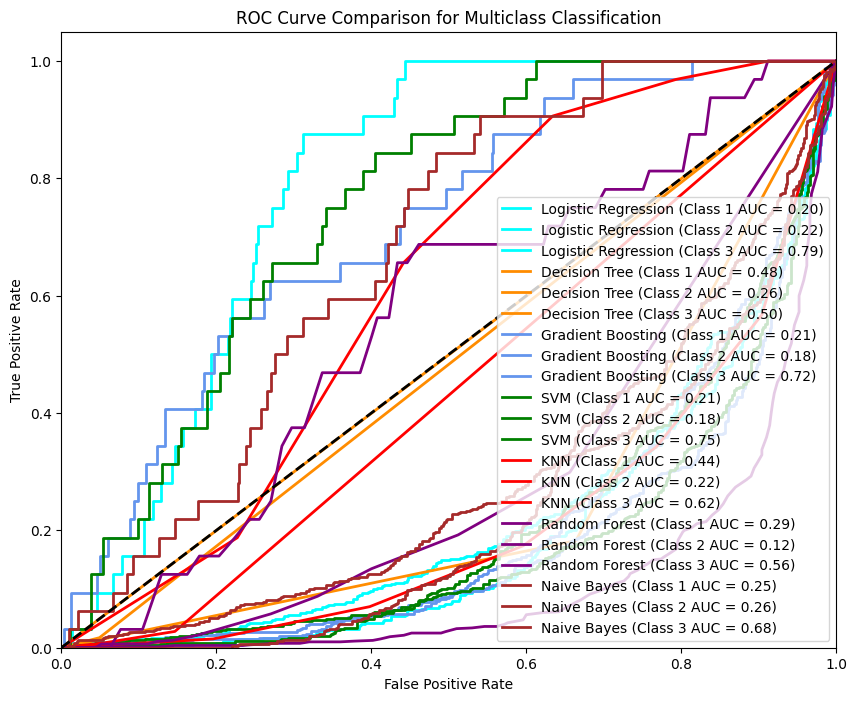

In [27]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for ROC curve (multiclass to binary)
y_bin = label_binarize(y_test, classes=['low', 'medium', 'high'])

# AUC-ROC Curve comparison for multiclass classification
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for (model_name, model), color in zip(models.items(), colors):
    # Binarize the output labels for each model (if necessary)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)
    else:  # Some models like SVC use decision_function
        y_prob = model.decision_function(X_test_scaled)
    
    # Compute ROC curve and AUC score for each class
    for i in range(y_bin.shape[1]):  # Iterate over each class
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve for each class
        plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (Class {i+1} AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


* Class 1 (low): corresponds to wines with quality labeled as 'low' (quality ≤ 5).
* Class 2 (medium): corresponds to wines with quality labeled as 'medium' (quality between 6 and 7).
* Class 3 (high): corresponds to wines with quality labeled as 'high' (quality > 7).

**In the ROC curve plot**

* Class 1: It refers to the low quality wines.
* Class 2: It refers to the medium quality wines.
* Class 3: It refers to the high quality wines.